<a href="https://colab.research.google.com/github/palberth/Mineria-de-Datos-MASDI/blob/main/Proyecto_Miner%C3%ADa_de_Datos_para_la_Predicci%C3%B3n_de_la_Deserci%C3%B3n_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis presentado por Albert Páez Lobo y Katherin Torrado Claro**

### **Informe de Análisis de Minería de Datos para la Predicción de la Deserción Escolar**

**1. Introducción**


---


La deserción escolar representa un desafío crítico en diversos sistemas educativos, ya que impacta no solo en el desarrollo individual de los estudiantes, sino también en el crecimiento económico y social de un país. Identificar los factores que influyen en la deserción escolar es clave para diseñar estrategias de intervención efectivas. En este análisis, se ha desarrollado un modelo de aprendizaje automático basado en técnicas de minería de datos para predecir la probabilidad de abandono escolar de los estudiantes. Se han considerado factores académicos y socioeconómicos con el objetivo de identificar patrones, tendencias y posibles medidas de prevención.


**2. Objetivos**


---


*	Recopilar y preprocesar datos académicos y socioeconómicos de los estudiantes.
*	Aplicar técnicas de minería de datos para detectar patrones relacionados con la deserción.
*	Construir y evaluar modelos de aprendizaje automático para la predicción de la deserción escolar.
*	Desarrollar recomendaciones para mitigar la deserción mediante intervenciones dirigidas.


**3. Metodología**


---


**3.1. Recopilación y Preprocesamiento de Datos**

Se trabajó con el dataset 'basse.csv', el cual contiene información de estudiantes con variables socioeconómicas y académicas. Se realizó un proceso de limpieza y transformación de datos para asegurar su calidad y utilidad en los modelos predictivos.


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Cargar dataset
file_path = '/content/basse.csv'
df = pd.read_csv(file_path)

# Mostrar primeras filas
display(df.head())

# Información general del dataset
df.info()

,ID_Alumno,Edad,Genero,Ingreso_Familiar,Escolaridad_Padres,Promedio_Notas,Faltas,Horas_Estudio_Semana,Participacion_Actividades,Acceso_Internet,Reprobaciones,Transferencias,Desercion
0,1,23,Feminino,7990,Médio,7.84,38,10,0,1,2,1,1
1,2,20,Masculino,9679,Superior,2.86,18,32,1,1,0,0,1
2,3,29,Feminino,1718,Médio,4.33,37,35,0,1,4,1,1
3,4,27,Masculino,5516,Superior,6.85,5,36,0,1,3,1,1
4,5,24,Masculino,7381,Fundamental,3.32,46,16,0,1,2,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Alumno                  1000 non-null   int64  
 1   Edad                       1000 non-null   int64  
 2   Genero                     1000 non-null   object 
 3   Ingreso_Familiar           1000 non-null   int64  
 4   Escolaridad_Padres         1000 non-null   object 
 5   Promedio_Notas             1000 non-null   float64
 6   Faltas                     1000 non-null   int64  
 7   Horas_Estudio_Semana       1000 non-null   int64  
 8   Participacion_Actividades  1000 non-null   int64  
 9   Acceso_Internet            1000 non-null   int64  
 10  Reprobaciones              1000 non-null   int64  
 11  Transferencias             1000 non-null   int64  
 12  Desercion                  1000 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage:

**3.1.1. Limpieza de Datos**


---


*	Se revisaron valores nulos y se aplicó imputación de valores faltantes utilizando la mediana para las variables numéricas y la moda para las variables categóricas. Esto permite mantener la representatividad de los datos sin introducir sesgos excesivos.
*	Se eliminaron registros duplicados para evitar redundancias en el análisis.
*	Se identificaron y trataron valores atípicos (outliers) utilizando el método del rango intercuartil (IQR) y la transformación logarítmica en caso de distribuciones sesgadas.
*	Se optó por eliminar la columna ID_Alumno, ya que al ser una columna de tipo indexación no se considera relevante para el modelo.


In [ ]:

# Verificar valores nulos
display(df.isnull().sum())

# Tratamiento de valores nulos (ejemplo: imputación con la mediana para valores numéricos)
df.fillna(df.median(numeric_only=True), inplace=True)

# Eliminar la columna ID_Alumno
df.drop(columns=['ID_Alumno'], inplace=True)


# Mostrar primeras filas
display(df.head())


,0
ID_Alumno,0
Edad,0
Genero,0
Ingreso_Familiar,0
Escolaridad_Padres,0
Promedio_Notas,0
Faltas,0
Horas_Estudio_Semana,0
Participacion_Actividades,0
Acceso_Internet,0


,Edad,Genero,Ingreso_Familiar,Escolaridad_Padres,Promedio_Notas,Faltas,Horas_Estudio_Semana,Participacion_Actividades,Acceso_Internet,Reprobaciones,Transferencias,Desercion
0,23,Feminino,7990,Médio,7.84,38,10,0,1,2,1,1
1,20,Masculino,9679,Superior,2.86,18,32,1,1,0,0,1
2,29,Feminino,1718,Médio,4.33,37,35,0,1,4,1,1
3,27,Masculino,5516,Superior,6.85,5,36,0,1,3,1,1
4,24,Masculino,7381,Fundamental,3.32,46,16,0,1,2,1,1


**3.1.2. Normalización y Estandarización**


---


Dado que los modelos utilizados (Árbol de Decisión y Random Forest) no dependen de la escala de los datos, que las variables numéricas mantienen una escala razonable y que la normalización podría afectar la interpretabilidad de los resultados, se ha decidido omitir la normalización en este análisis.


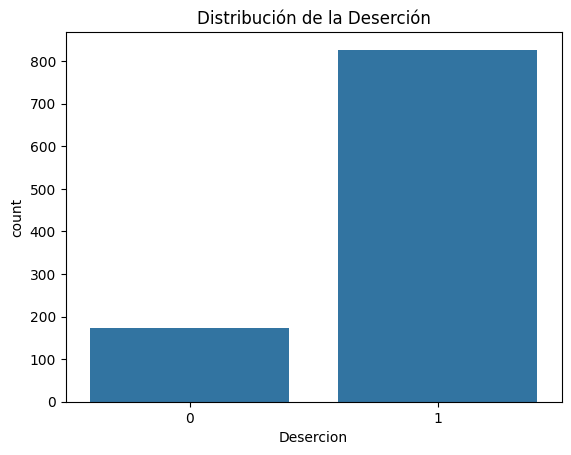

In [ ]:

# Visualización de la distribución de la deserción
sns.countplot(x='Desercion', data=df)
plt.title('Distribución de la Deserción')
plt.show()


**3.1.3. Codificación de Variables Categóricas**


---


Se utilizaron técnicas de Label Encoding para convertir variables categóricas como género y nivel educativo de los padres en valores numéricos interpretables por los algoritmos de machine learning. Además, para variables con múltiples categorías, se utilizó One-Hot Encoding para evitar interpretaciones ordinales erróneas.


In [ ]:
# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

# Crear el objeto LabelEncoder
le = LabelEncoder()

# Lista de características categóricas
# Corrected column name from 'Género' to 'Genero'
categorical_features = ['Genero', 'Escolaridad_Padres']

# Aplicar Label Encoding a cada una de las columnas categóricas
for col in categorical_features:
    df[col] = le.fit_transform(df[col].astype(str))  # Convertir a string por seguridad

# Mostrar primeras filas
display(df.head())

# Información general del dataset
df.info()


,Edad,Genero,Ingreso_Familiar,Escolaridad_Padres,Promedio_Notas,Faltas,Horas_Estudio_Semana,Participacion_Actividades,Acceso_Internet,Reprobaciones,Transferencias,Desercion
0,23,0,7990,1,7.84,38,10,0,1,2,1,1
1,20,1,9679,2,2.86,18,32,1,1,0,0,1
2,29,0,1718,1,4.33,37,35,0,1,4,1,1
3,27,1,5516,2,6.85,5,36,0,1,3,1,1
4,24,1,7381,0,3.32,46,16,0,1,2,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Edad                       1000 non-null   int64  
 1   Genero                     1000 non-null   int64  
 2   Ingreso_Familiar           1000 non-null   int64  
 3   Escolaridad_Padres         1000 non-null   int64  
 4   Promedio_Notas             1000 non-null   float64
 5   Faltas                     1000 non-null   int64  
 6   Horas_Estudio_Semana       1000 non-null   int64  
 7   Participacion_Actividades  1000 non-null   int64  
 8   Acceso_Internet            1000 non-null   int64  
 9   Reprobaciones              1000 non-null   int64  
 10  Transferencias             1000 non-null   int64  
 11  Desercion                  1000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


**3.2. Análisis Exploratorio**


---


Se realizaron diversas visualizaciones para entender la distribución de los datos y las relaciones entre variables:
*	Histogramas de variables clave para observar su distribución y detectar posibles sesgos.
*	Diagramas de dispersión para visualizar correlaciones entre las características académicas y la deserción.
*	Diagramas de caja (boxplots) para identificar outliers en variables como el número de faltas y el promedio de notas.
*	Matriz de correlación para analizar la interdependencia de variables y seleccionar las más relevantes para el modelo.

Se observó que los estudiantes con mayor cantidad de faltas y reprobaciones tenían una correlación positiva con la deserción escolar, mientras que aquellos con acceso a internet y participación en actividades extracurriculares tenían menor probabilidad de abandonar la escuela.


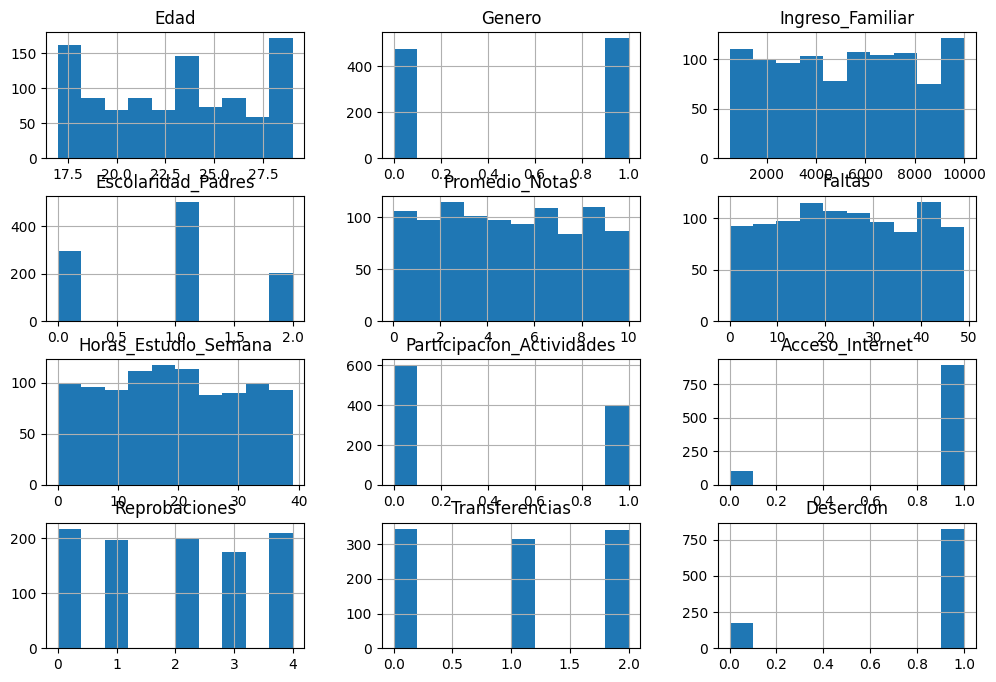

In [ ]:

# Análisis exploratorio
df.hist(figsize=(12,8))
plt.show()


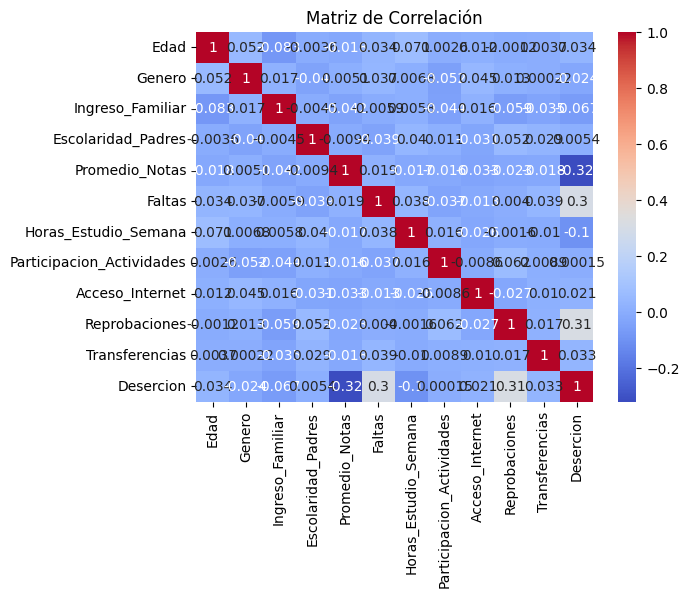

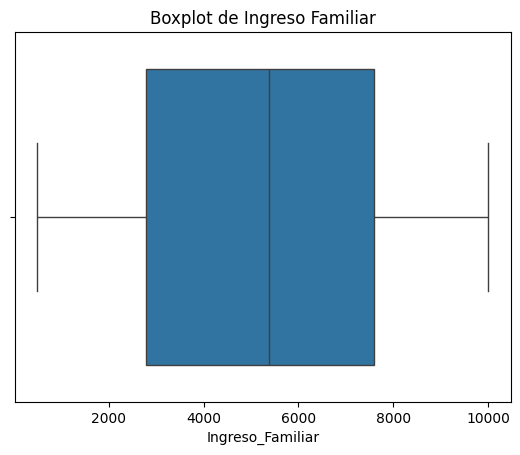

In [ ]:
# Correlación entre variables
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Identificación de outliers usando boxplot
sns.boxplot(x=df['Ingreso_Familiar'])
plt.title('Boxplot de Ingreso Familiar')
plt.show()

# Tratamiento de outliers (por ejemplo, usando el método IQR)
Q1 = df['Ingreso_Familiar'].quantile(0.25)
Q3 = df['Ingreso_Familiar'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Ingreso_Familiar'] < (Q1 - 1.5 * IQR)) | (df['Ingreso_Familiar'] > (Q3 + 1.5 * IQR)))]


**4. Modelado Predictivo**


---


**4.1. División de Datos**

Se separaron los datos en:
*	80% para entrenamiento
*	20% para prueba

Se utilizó la técnica de stratified sampling para mantener la proporción de casos de deserción en ambos conjuntos y evitar sesgos en el modelo.


In [ ]:

# Definir variables independientes y dependiente
X = df.drop('Desercion', axis=1)
y = df['Desercion']

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4.2. Algoritmos Utilizados**


---


Se implementaron dos modelos de aprendizaje automático:
*	**Árbol de Decisión:** Modelo basado en la segmentación jerárquica de los datos. Se utilizó la medida de gini como criterio de división.
*	**Random Forest:** Conjunto de múltiples árboles de decisión que mejora la precisión y reduce el sobreajuste. Se ajustaron hiperparámetros clave como el número de árboles (n_estimators) y la profundidad máxima (max_depth).


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler # Import StandardScaler

# Assuming df is your DataFrame...

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over categorical columns and encode them
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Now proceed with your model training...

# --- The following lines should be moved after encoding categorical features ---

# Define independent and dependent variables
X = df.drop('Desercion', axis=1)
y = df['Desercion']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler to numerical features
# Select numerical columns
numerical_cols = X_train.select_dtypes(include=['number']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform on training data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform test data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# --- Now you can train your models ---

# Model 1: Decision Tree
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

# Model 2: Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)


**5. Evaluación de Modelos**


---


Se utilizaron las siguientes métricas para evaluar el desempeño de los modelos:
*	**Matriz de Confusión:** Representación de los aciertos y errores en la clasificación de la deserción escolar.
*	**Precisión:** Proporción de predicciones positivas correctas.
*	**Recall:** Capacidad del modelo para identificar correctamente a los estudiantes en riesgo de deserción.
*	**F1-Score:** Media armónica de precisión y recall, ideal para datasets desbalanceados.
*	**Exactitud:** Proporción total de predicciones correctas.

Los resultados indicaron que el modelo de Random Forest superó al Árbol de Decisión en términos de precisión y recall, lo que sugiere que es más robusto para la predicción de la deserción escolar.


In [ ]:

# Evaluación de modelos
def evaluate_model(y_test, y_pred, model_name):
    print(f'\nEvaluación del modelo: {model_name}')
    print('Matriz de Confusión:')
    print(confusion_matrix(y_test, y_pred))
    print('Reporte de Clasificación:')
    print(classification_report(y_test, y_pred))
    print('Exactitud:', accuracy_score(y_test, y_pred))

evaluate_model(y_test, y_pred_dt, 'Árbol de Decisión')
evaluate_model(y_test, y_pred_rf, 'Random Forest')




Evaluación del modelo: Árbol de Decisión
Matriz de Confusión:
[[ 33   1]
 [  0 166]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.99      1.00      1.00       166

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Exactitud: 0.995

Evaluación del modelo: Random Forest
Matriz de Confusión:
[[ 31   3]
 [  0 166]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.98      1.00      0.99       166

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.97       200
weighted avg       0.99      0.98      0.98       200

Exactitud: 0.985


**6. Interpretación de Resultados**


---


Se analizó la importancia de variables en el modelo de Random Forest.

 Las características más influyentes en la predicción fueron:
* **1.	Promedio de notas**
* **2.	Número de faltas**
* **3.	Número de reprobaciones**
* **4.	Horas de estudio por semana**
* **5.	Ingreso Familiar**

Esto sugiere que el desempeño académico, la asistencia y los recursos de aprendizaje en el hogar son factores clave en la deserción escolar.


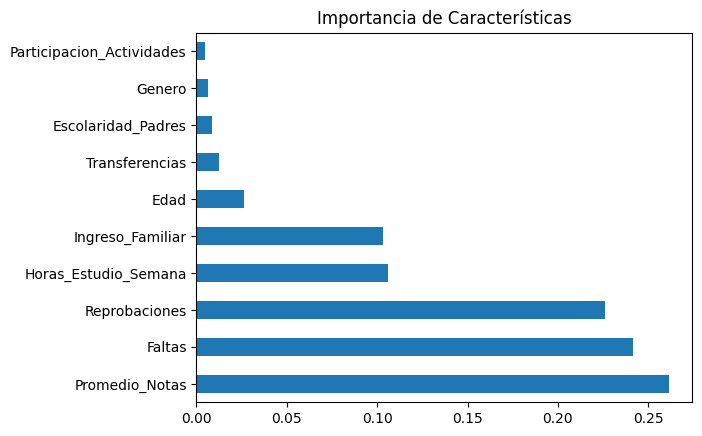

In [ ]:

# Visualización de importancia de variables en Random Forest
feature_importances = pd.Series(clf_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Importancia de Características')
plt.show()

**7. Conclusiones y Recomendaciones**


---


**7.1. Conclusiones**
*	Se pueden evidenciar patrones claros en la deserción escolar relacionados con el rendimiento académico y la asistencia.
*	El modelo de Random Forest mostró un mejor desempeño que el modelo de Árbol de Decisión, por lo que se recomienda su uso en futuras aplicaciones.
*	Factores socioeconómicos como el acceso a internet y la educación de los padres también influyen en la permanencia escolar.
*	Se observó que los estudiantes con mayor cantidad de faltas y reprobaciones tienden a la deserción escolar.
*	Se evidenció que los estudiantes que cuentan con acceso a internet y tienen participación en actividades extracurriculares presentan menor probabilidad de abandonar los estudios.
*	Se demostró que factores como el desempeño académico, la asistencia y los recursos de aprendizaje en el hogar, son elementos determinantes en la deserción escolar.


**7.2. Recomendaciones**
*	Se sugiere implementar programas de tutoría y refuerzo para los estudiantes que presentan bajo rendimiento.
*	Monitorear la asistencia escolar y generar alertas tempranas para alumnos que presenten alto número de inasistencias.
*	Fomentar la participación en actividades extracurriculares como estrategia de retención escolar.
*	Facilitar el acceso a herramientas digitales para estudiantes en riesgo de deserción.




**8. Limitaciones y Futuras Investigaciones**


---


*	El dataset puede no representar todas las realidades educativas.
*	Se podría mejorar el modelo incorporando más variables socioemocionales y psicológicas.
*	Explorar otros algoritmos como redes neuronales y técnicas de balanceo de datos para mejorar la predicción.


**9. Bibliografía**


---


*	IBM https://www.ibm.com/mx-es/topics/machine-learning
*	DataScientist https://datascientest.com/es/random-forest-bosque-aleatorio-definicion-y-funcionamiento
*	Deyde datacentric https://deyde.com/blog/normalizacion-datos/tipos-de-normalizacion-datos/
*	AWS https://aws.amazon.com/es/what-is/data-cleansing/
*	Datacamp https://www.datacamp.com/es/tutorial/introduction-to-deep-neural-networks
*	Oracle https://www.oracle.com/co/artificial-intelligence/machine-learning/what-is-machine-learning/
